# Importing libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [20]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [55]:
df=pd.read_csv('/content/gdrive/My Drive/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [56]:
# Statistical info
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [60]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [61]:
# unique values
df.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# Preprocessing data

In [62]:
#check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [63]:
df = df.rename(columns={'weathersit':'weather',
                        'yr':'year',
                        'mnth':'month',
                        'hum':'humidity',
                        'cnt':'count'})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [64]:
df=df.drop(columns=['instant','dteday'])

In [65]:
# change int column to category
cols = ['season','month','year','holiday','weekday','workingday','weather']

for col in cols:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 46.5 KB


# Exploratory Data Analysis

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

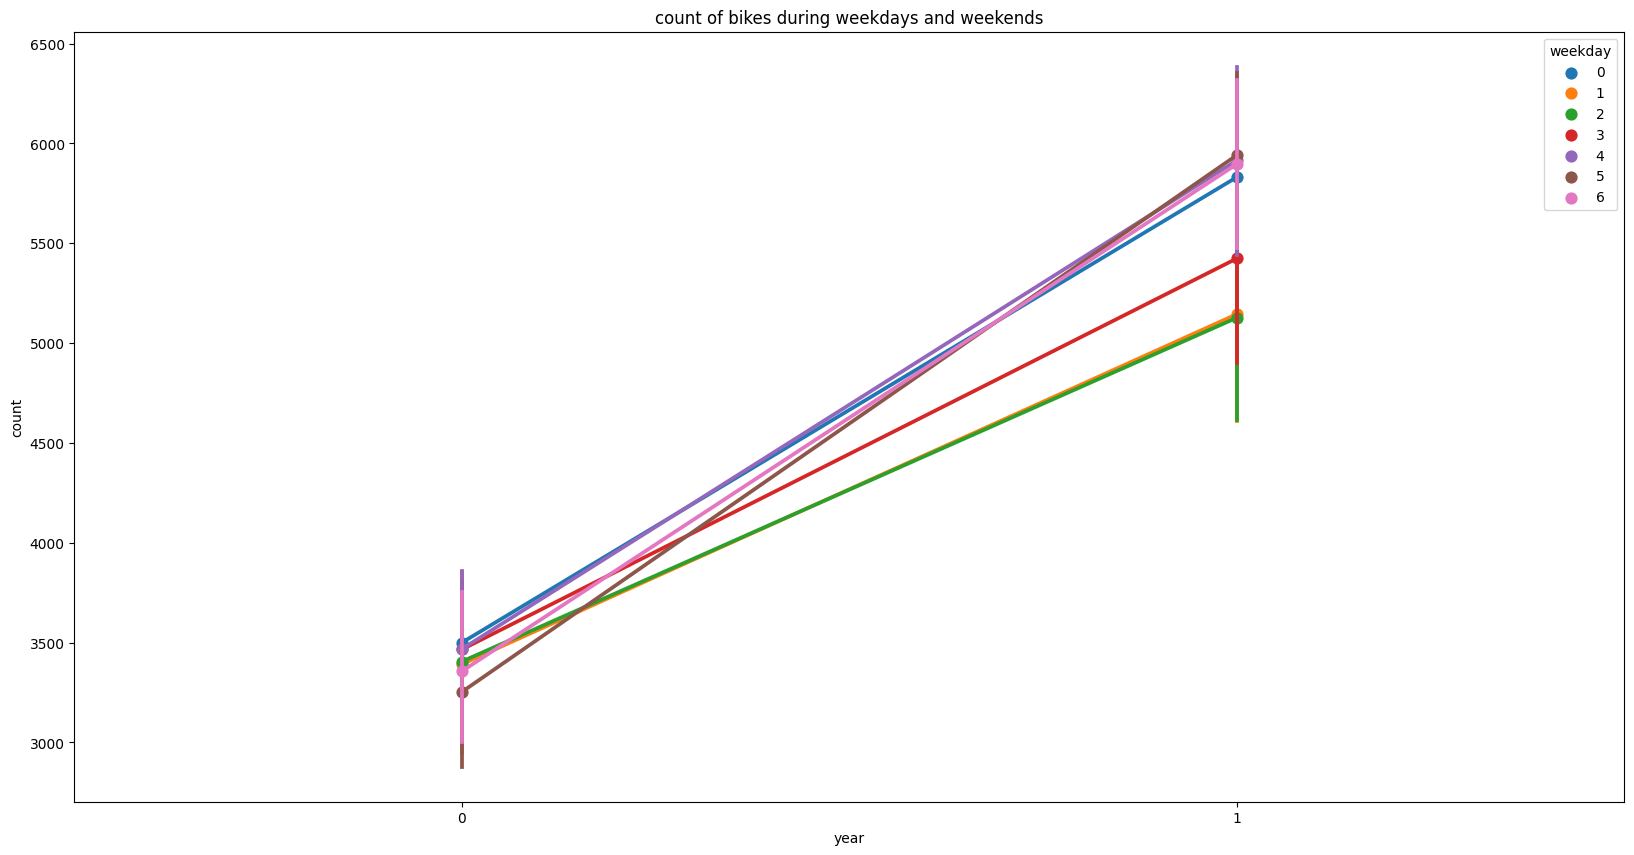

In [66]:
fig, ax =plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='year', y='count', hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends:Unregisterd users')]

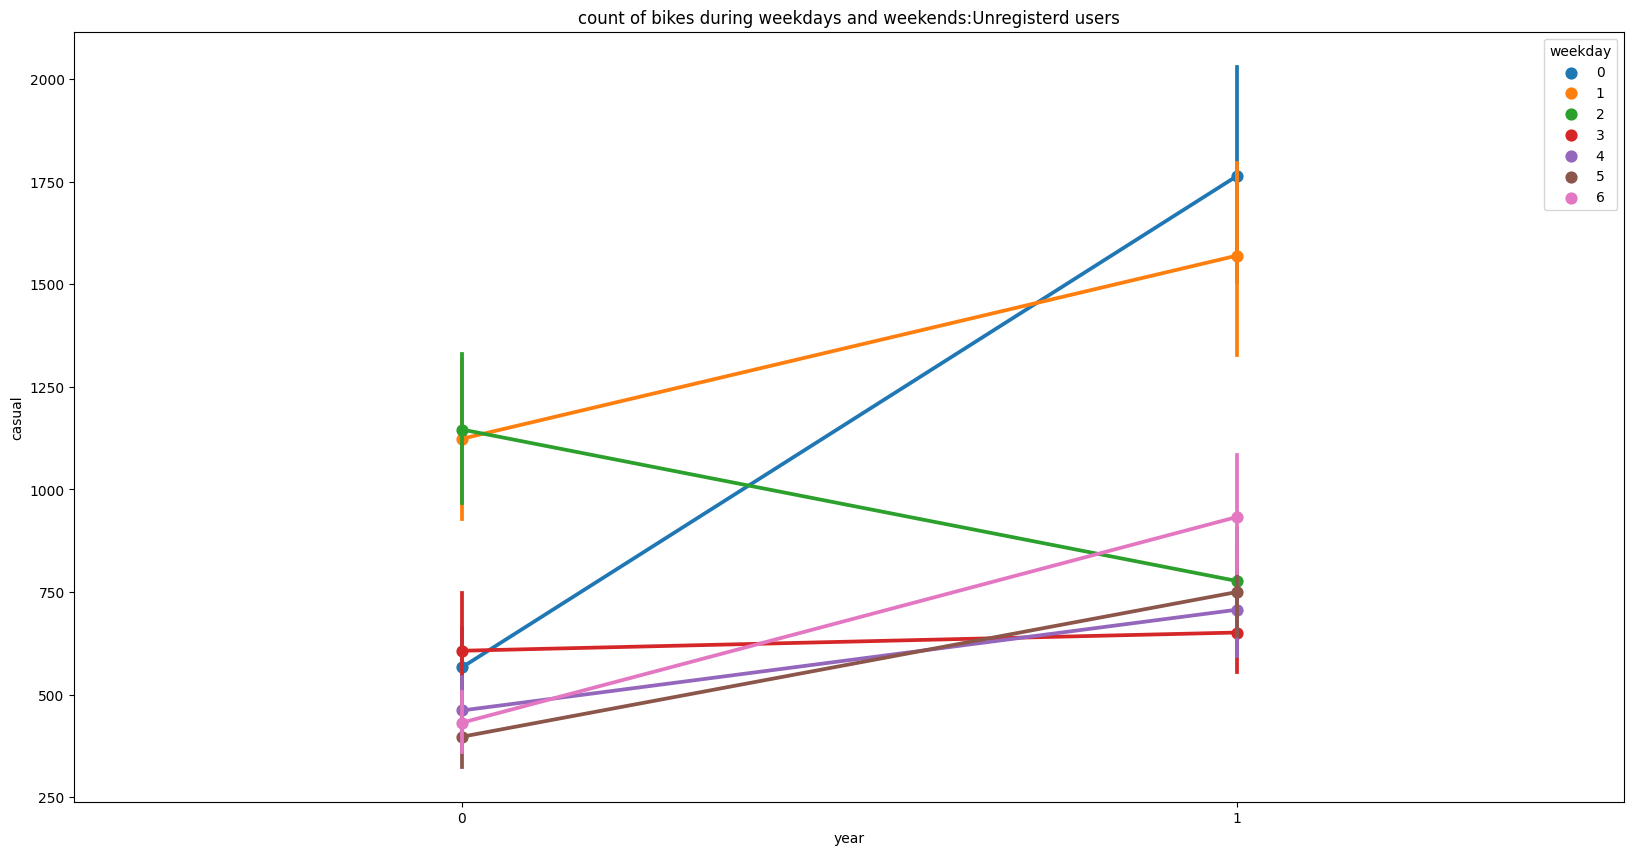

In [67]:
fig, ax =plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='year', y='casual', hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends:Unregisterd users')

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends:Registered Users')]

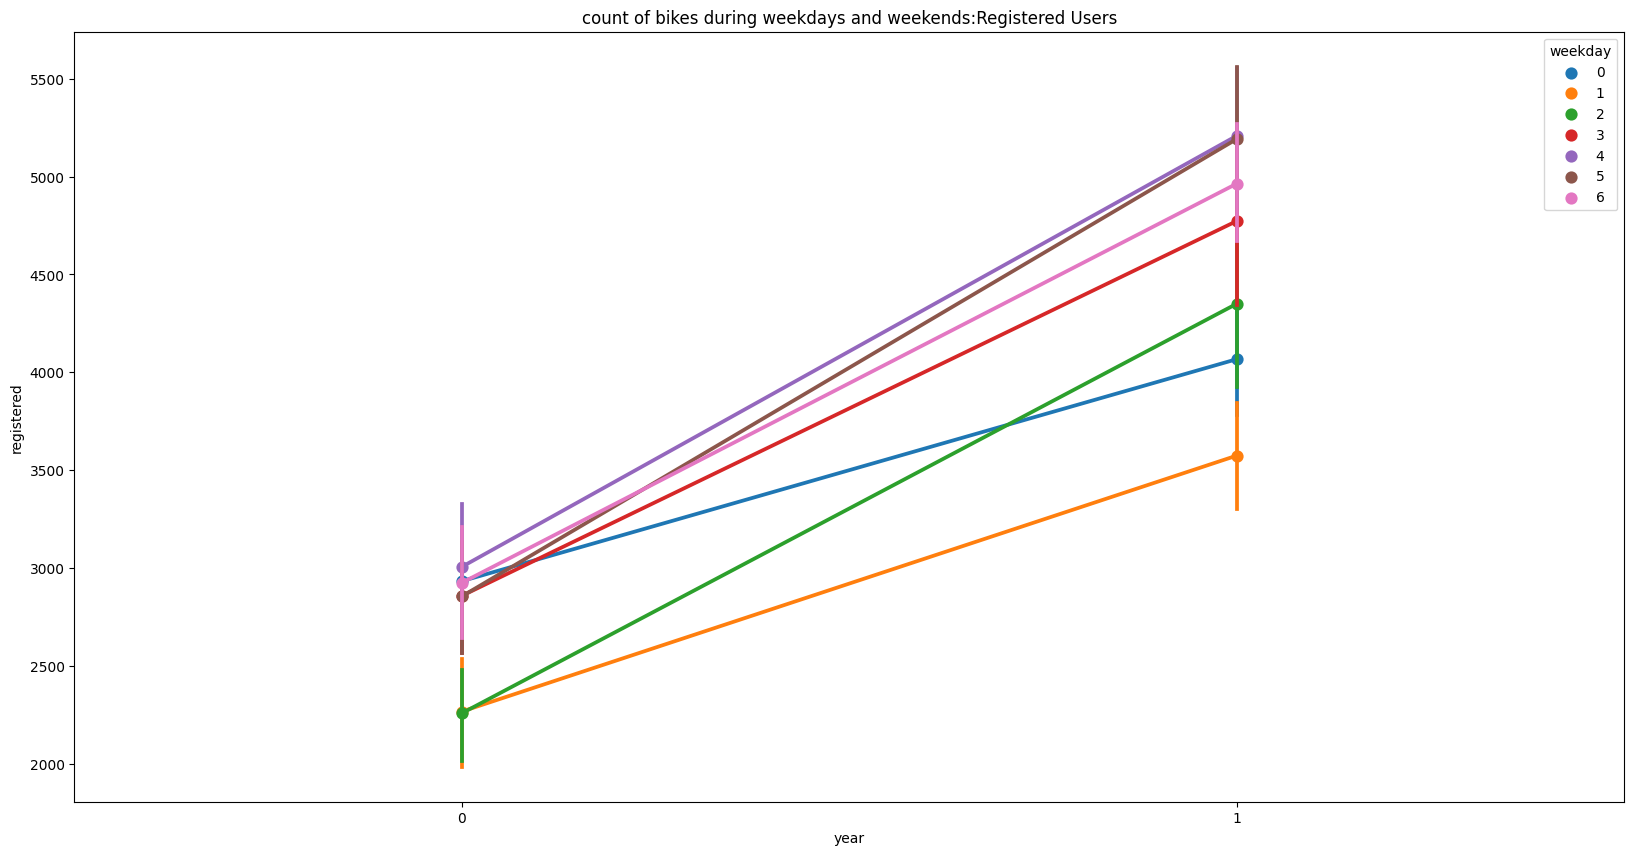

In [68]:
fig, ax =plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='year', y='registered', hue='weekday',ax=ax)
ax.set(title='count of bikes during weekdays and weekends:Registered Users')

[Text(0.5, 1.0, 'count of bikes during different weathers')]

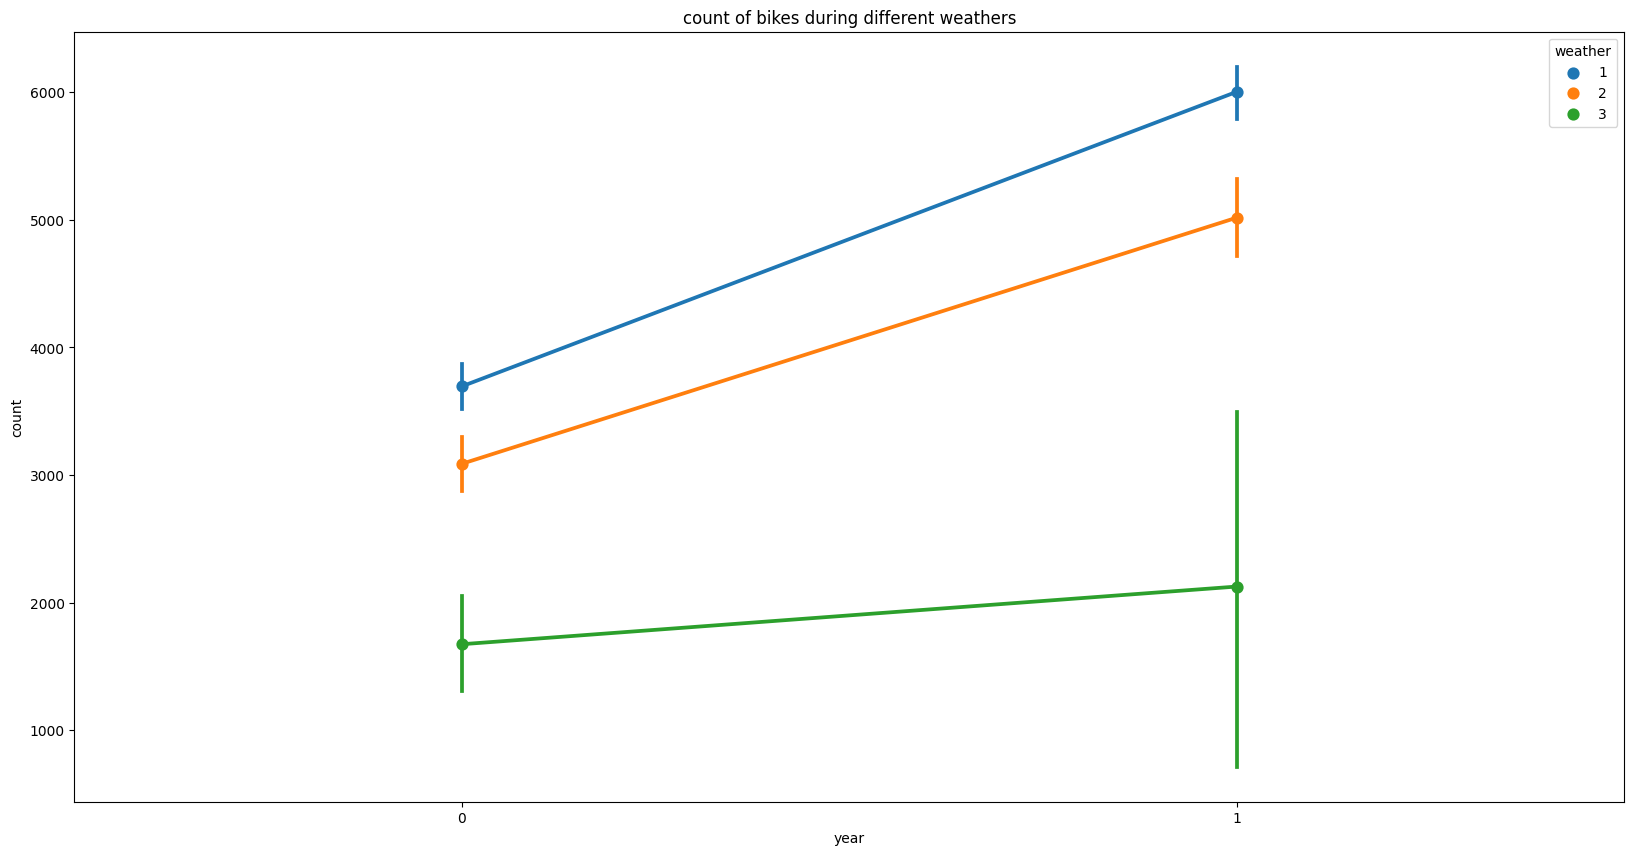

In [69]:
fig, ax =plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='year', y='count', hue='weather',ax=ax)
ax.set(title='count of bikes during different weathers')

[Text(0.5, 1.0, 'count of bikes during different seasons')]

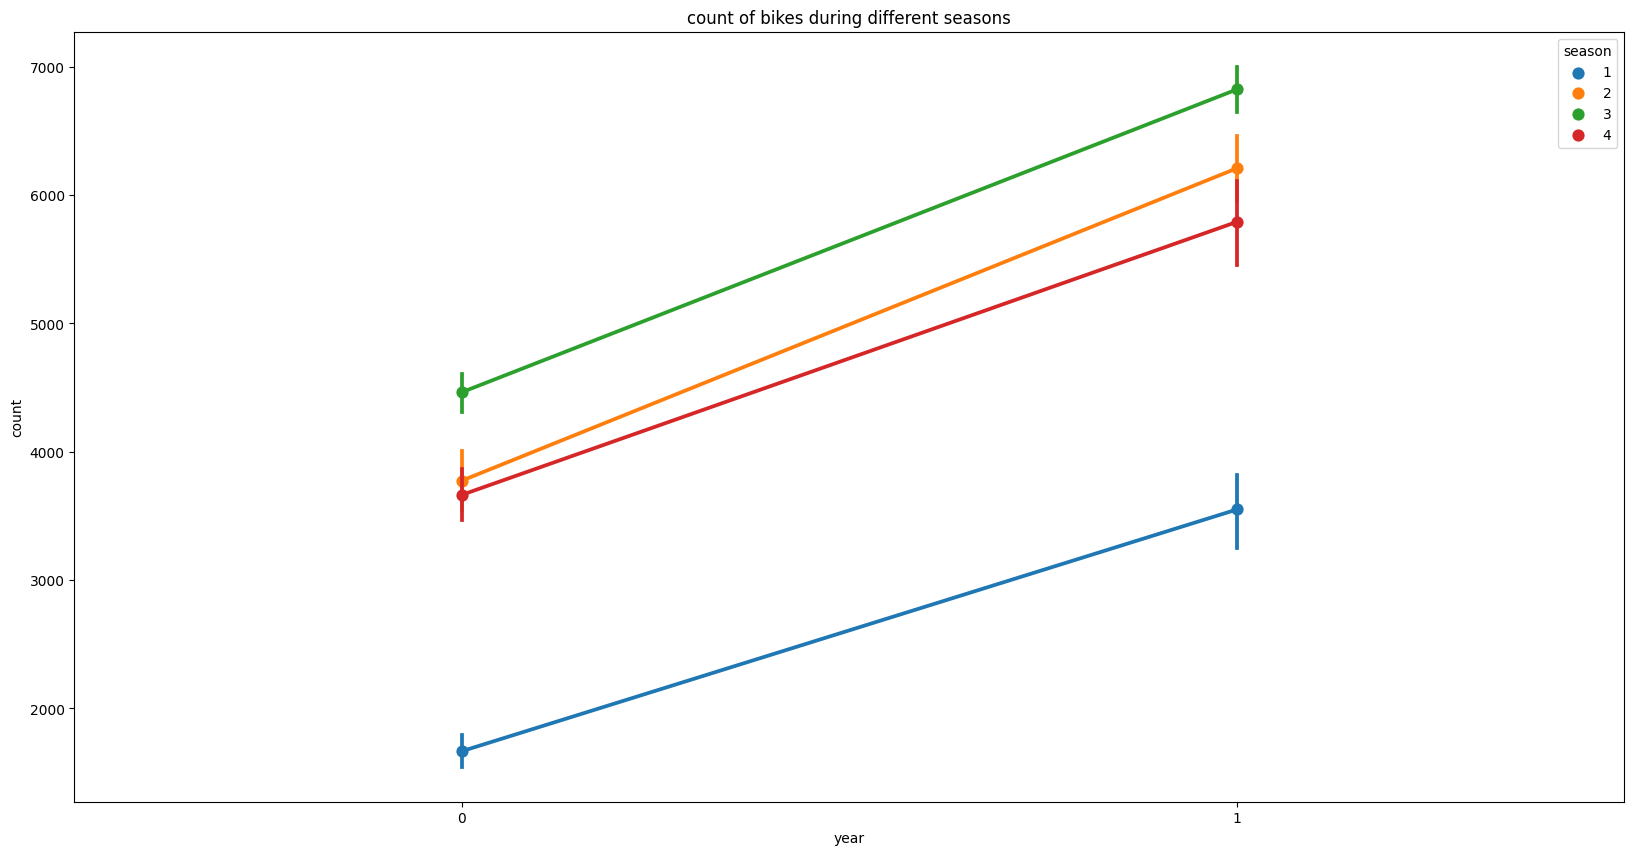

In [70]:
fig, ax =plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='year', y='count', hue='season',ax=ax)
ax.set(title='count of bikes during different seasons')

[Text(0.5, 1.0, 'count of bikes during different months')]

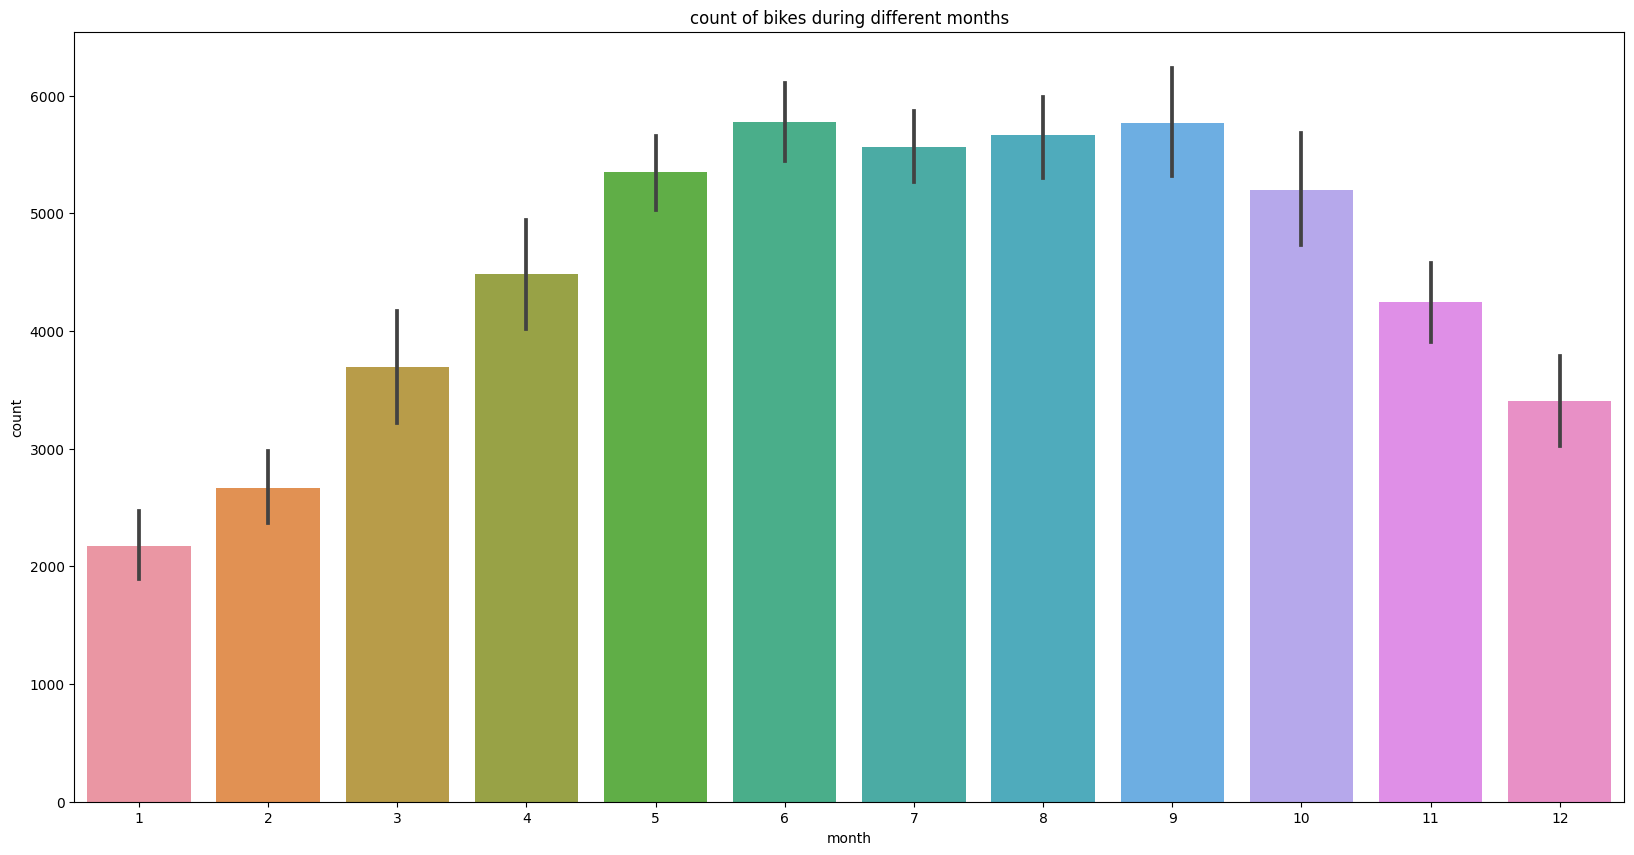

In [71]:
fig, ax =plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count',ax=ax)
ax.set(title='count of bikes during different months')

[Text(0.5, 1.0, 'count of bikes during different days')]

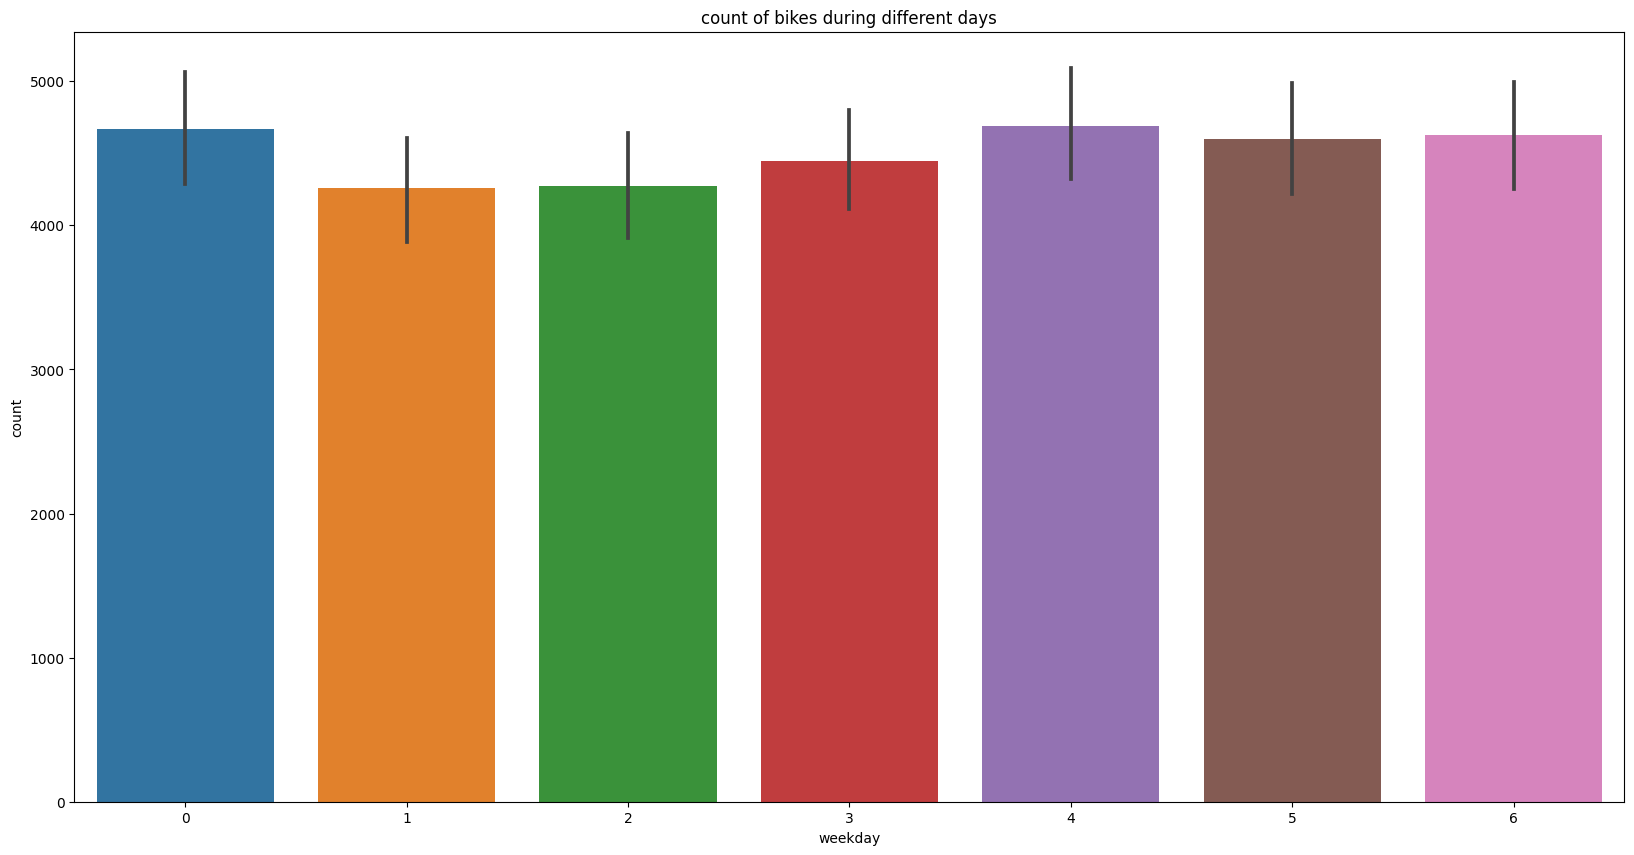

In [72]:
fig, ax =plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count',ax=ax)
ax.set(title='count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

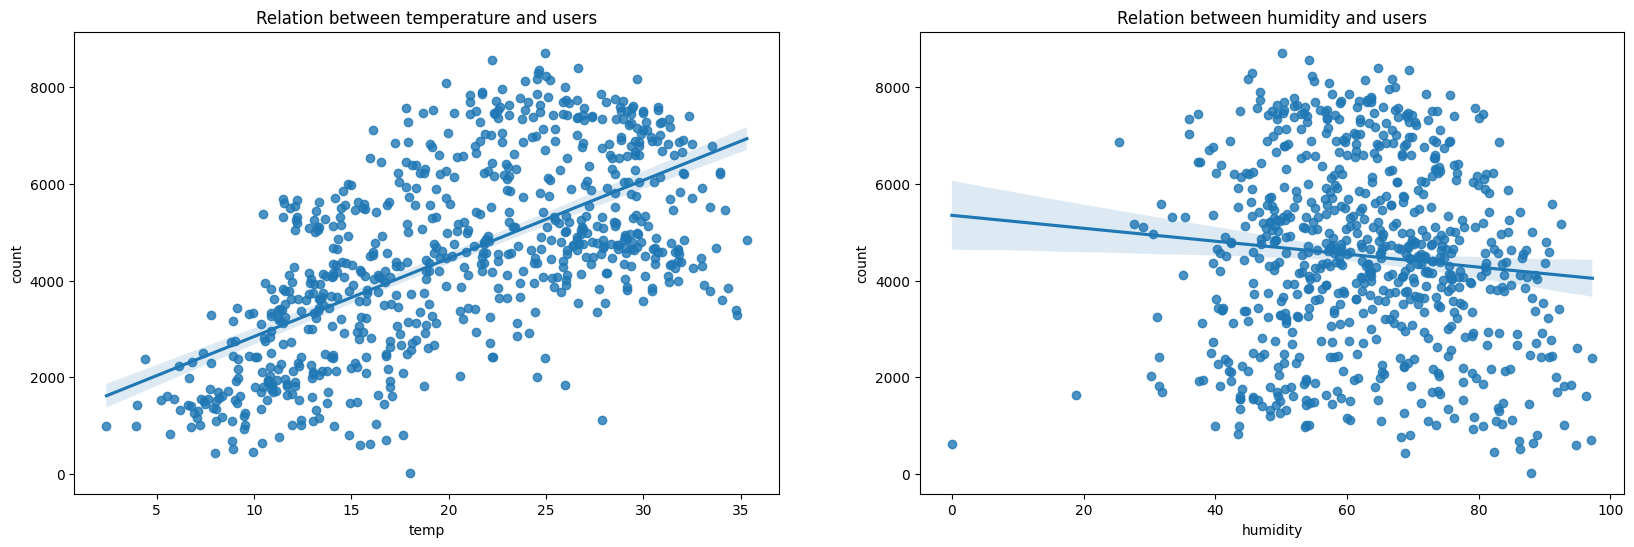

In [76]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=df['temp'],y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'],y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")


[Text(0.5, 1.0, 'Theoritical quantities')]

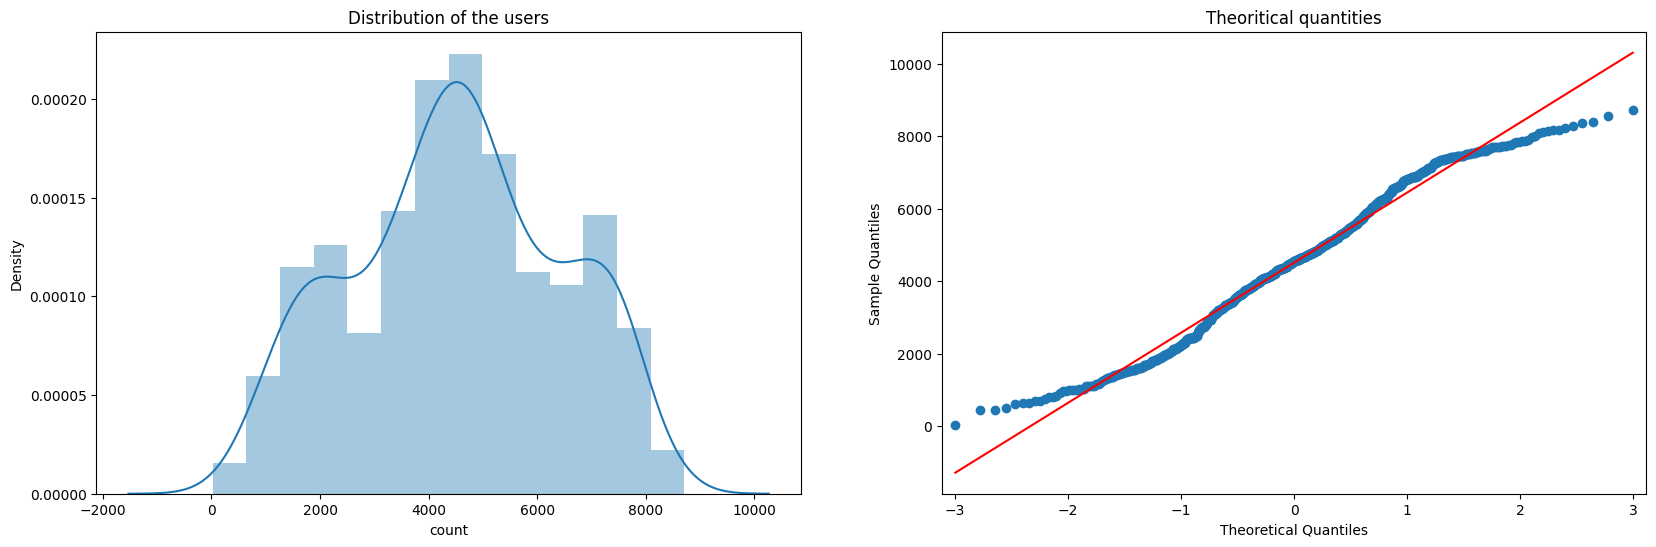

In [79]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(df['count'],ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'],ax=ax2,line='s')
ax2.set(title='Theoritical quantities')

[Text(0.5, 1.0, 'Theoritical quantities')]

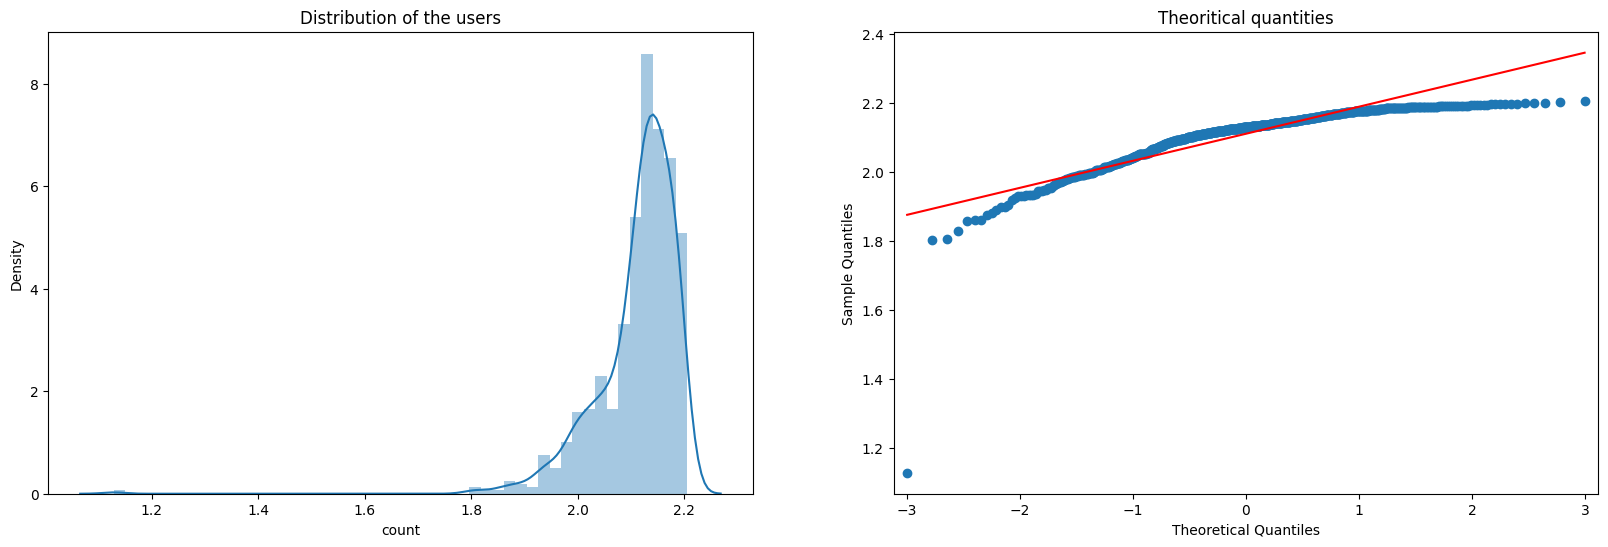

In [81]:
df['count']=np.log(df['count'])
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(df['count'],ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'],ax=ax2,line='s')
ax2.set(title='Theoritical quantities')

# Corelation matrix

<Axes: >

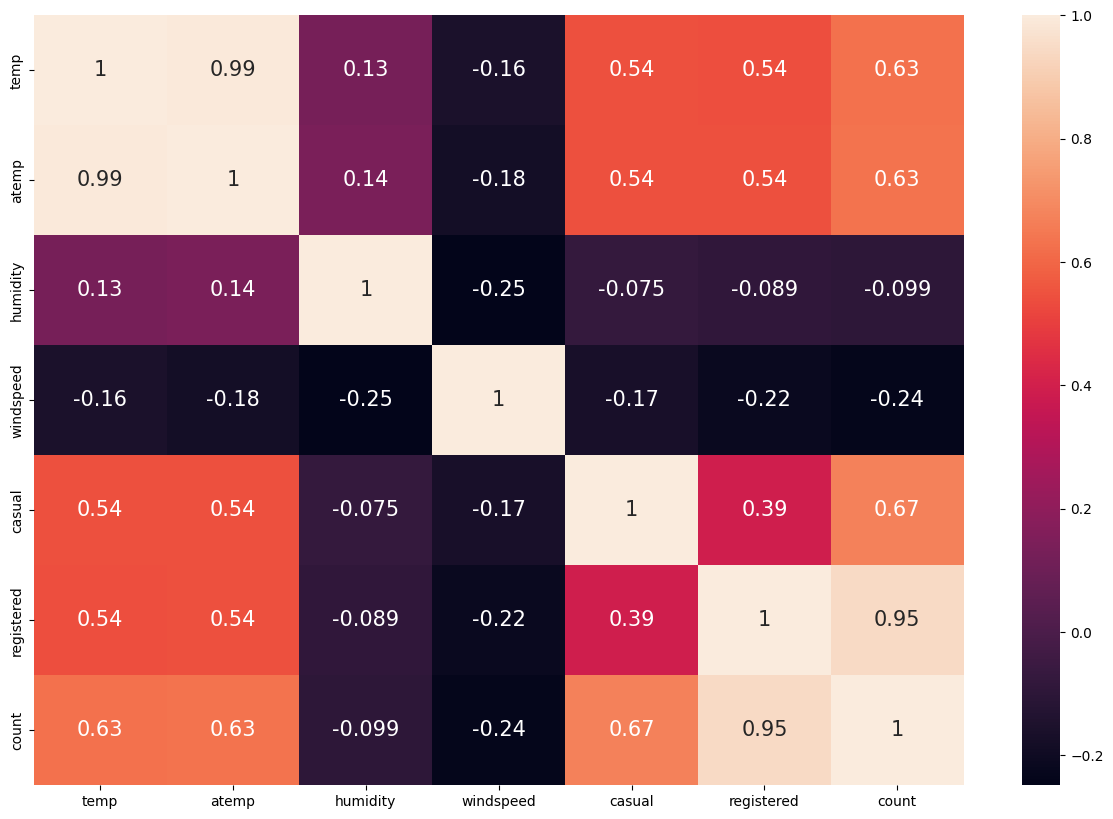

In [53]:
corr =df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

# One Hot Encoding

In [84]:
pd.get_dummies(df['season'],prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [86]:
df_oh=df
def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column],prefix=column, drop_first=True)], axis=1)
  data=data.drop([column],axis=1)
  return data

cols = ['season','month','year','holiday','weekday','workingday','weather']

for col in cols:
  df_oh = one_hot_encoding(df_oh,col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_1,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,14.110847,18.18125,80.5833,10.749882,331,654,1.930454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,1.899995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1.975069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1.995207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1.998470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


# Input Split

In [87]:
X = df_oh.drop(columns=['atemp','windspeed','casual','registered','count'],axis=1)
y = df_oh['count']

# Model Training

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          ExtraTreesRegressor(),
          GradientBoostingRegressor()]

In [109]:
from sklearn import model_selection
def train(model):
  kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)
  pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
  cv_score = pred.mean()
  print('Model:',model)
  print('CV score:',(cv_score))

In [110]:
for model in models:
  train(model)

Model: LinearRegression()
CV score: -0.0023013520730015102
Model: Ridge()
CV score: -0.0022863346796665905
Model: HuberRegressor()
CV score: -0.005298559455956484
Model: ElasticNetCV()
CV score: -0.0024002350712194432
Model: DecisionTreeRegressor()
CV score: -0.0032317035174130246
Model: RandomForestRegressor()
CV score: -0.002350718630119871
Model: ExtraTreesRegressor()
CV score: -0.0023220290201678207
Model: GradientBoostingRegressor()
CV score: -0.002857675520109776


In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [117]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

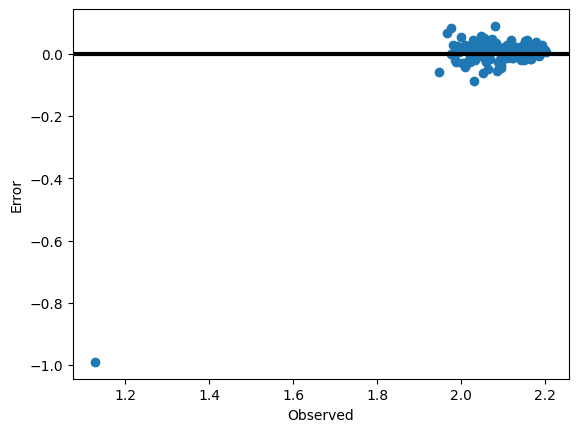

In [119]:
# plot the error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test,error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.07710644305592612